In [28]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [29]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,0,0,0,0,0,0,0,0,...,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,3,4
5,British Columbia,Canada,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,7,7,8,10
6,New South Wales,Australia,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,6
7,Victoria,Australia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Queensland,Australia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NaN,Cambodia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'Avg daily % growth (14 days ending X)')

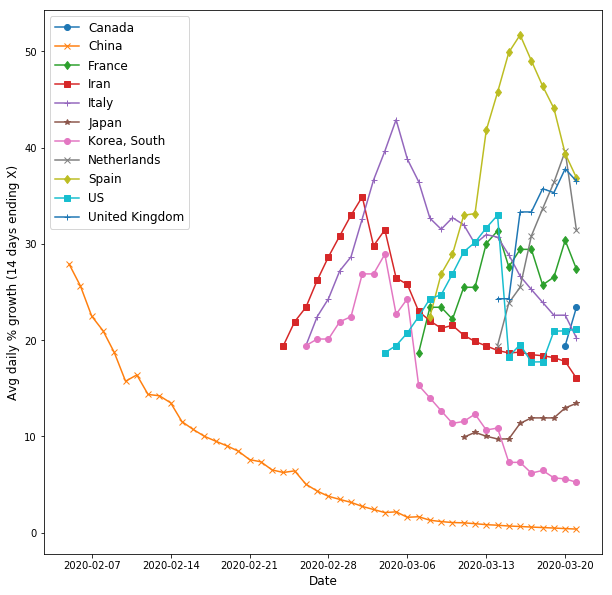

In [30]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>100)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']

fig, ax = plt.subplots()
#print(df.index[20:])
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
window=14
for c,m in zip(df.columns,markers):
    
    growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-(window-1)]),1.0/window)-1)*100 if df[c][i]>10 else float('nan') for i in range(window,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(df.index[window:], growth[c], marker=m)

font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
ax.legend(df.columns, prop=font)       
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Avg daily % growth ({} days ending X)'.format(window), size=12)
#plt.ylim((0,100))

In [31]:
maxDate = max(df.index)
threshold = 10
for c in df.columns:
    for i,a in enumerate(df[c]):        
        if a>=threshold:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
#del df['China']
df

,Canada,China,France,Iran,Italy,Japan,"Korea, South",Netherlands,Spain,US,United Kingdom
0,12.0,17,11.0,12.0,10.0,10.0,10.0,10.0,10.0,11.0,21.0
1,19.0,18,19.0,16.0,12.0,10.0,12.0,12.0,17.0,12.0,21.0
2,NaN,26,19.0,19.0,17.0,15.0,13.0,20.0,28.0,14.0,56.0
3,NaN,42,33.0,26.0,21.0,16.0,13.0,24.0,35.0,17.0,56.0
4,NaN,56,48.0,34.0,29.0,19.0,16.0,43.0,54.0,21.0,72.0
5,NaN,82,48.0,43.0,34.0,22.0,17.0,58.0,55.0,22.0,138.0
6,NaN,131,79.0,54.0,52.0,22.0,28.0,77.0,133.0,28.0,178.0
7,NaN,133,91.0,66.0,79.0,27.0,28.0,107.0,195.0,36.0,234.0
8,NaN,171,91.0,77.0,107.0,29.0,35.0,137.0,289.0,40.0,NaN
9,NaN,213,148.0,92.0,148.0,29.0,35.0,NaN,342.0,47.0,NaN


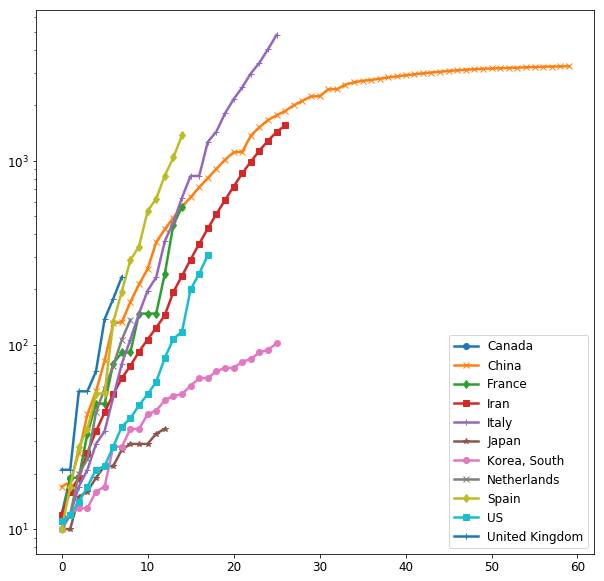

In [32]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
def plotdataframe(df, logy=False, legend=True):
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=2.5)
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(prop=font)

    return ax

plotdataframe(df, logy=True)